# Overview in Project And Dataset

# Project
## In this project we will use Neural Network to know the persone is stroke or not.

# Dataset
## We use Healthy-Care Database which is available on <a href = https://www.kaggle.com>Kaggle</a> You can view and download the dataset from this <a href = https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset>Link</a>.

In [1]:
import pandas as pd

data = pd.read_csv('healthcare-dataset-stroke-data.csv')

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
# Delete all Missing values from dataset.
data_clean = data.dropna(axis = 0)

# Splitting dataset to input and output.
data_input = data_clean.drop(columns = ['id', 'stroke'])
data_output = data_clean['stroke']

# Show the input only of dataset.
data_input.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [3]:
# Show the output only of dataset.
data_output.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [4]:
# To know number of row of class1 and class0.
data_output.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [5]:
# To solve imblance in dataset you should install imblearn.
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)


## Undersampling to reduce class 0 to become twice as class 1

In [6]:
from imblearn.under_sampling import RandomUnderSampler

# under_sampling
undersampler = RandomUnderSampler(
    sampling_strategy = 0.5, random_state = 0 # sampling_strategy ==> percentage of small class
)

# Change range of sample of dataset.
X, y = undersampler.fit_resample(
    data_input, data_output    
)

# print number of sample of each class.
print(y.value_counts())

0    418
1    209
Name: stroke, dtype: int64


## Oversampling: increase class 1 to become equal to class 0

In [7]:
from imblearn.over_sampling import RandomOverSampler

#over_sampling
oversampler = RandomOverSampler(
    sampling_strategy = 1.0, random_state = 0   # smpling_strategy to be percentage between two classes equal 1
)

# Change range of sample of dataset.
data_input_balanced, data_output_balanced = oversampler.fit_resample(
    X, y
)

# print number of sample of each class.
print(data_output_balanced.value_counts())

0    418
1    418
Name: stroke, dtype: int64


In [8]:
data_input_balanced.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [9]:
print(data_input_balanced['gender'].unique())
print(data_input_balanced['ever_married'].unique())
print(data_input_balanced['work_type'].unique())
print(data_input_balanced['Residence_type'].unique())

['Male' 'Female']
['Yes' 'No']
['Govt_job' 'Self-employed' 'children' 'Private' 'Never_worked']
['Rural' 'Urban']


## Encoding Dataset

In [10]:
# Encoding dataset ( binary and nominal data ).
data_encoded = data_input_balanced.replace({
    'gender': {'Male': 0, 'Female': 1},
    'ever_married': {'Yes': 1, 'No': 0},
    'Residence_type': {'Rural': 0, 'Urban': 1}
})

data_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,59.0,0,0,1,Govt_job,0,96.25,23.3,formerly smoked
1,0,70.0,0,0,1,Self-employed,1,223.68,34.3,formerly smoked
2,0,2.0,0,0,0,children,1,76.25,20.1,Unknown
3,0,45.0,0,0,1,Self-employed,1,101.92,26.9,Unknown
4,1,45.0,0,0,1,Private,1,90.35,22.3,never smoked


In [11]:
# One hot encoding to solve nomial data.
one_hot_encoding = pd.get_dummies(data_encoded)

one_hot_encoding.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,59.0,0,0,1,0,96.25,23.3,1,0,0,0,0,0,1,0,0
1,0,70.0,0,0,1,1,223.68,34.3,0,0,0,1,0,0,1,0,0
2,0,2.0,0,0,0,1,76.25,20.1,0,0,0,0,1,1,0,0,0
3,0,45.0,0,0,1,1,101.92,26.9,0,0,0,1,0,1,0,0,0
4,1,45.0,0,0,1,1,90.35,22.3,0,0,1,0,0,0,0,1,0


# Splitting dataset to Training, valiation and Testing

In [12]:
# Splitting dataset to ( Training , validaton and Testing ) 
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(one_hot_encoding, data_output_balanced,
                                          test_size = 0.20, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [13]:
# Show the shape of dataset.
print(X_train.shape)
print(y_train.shape)
print()
print(X_val.shape)
print(y_val.shape)
print()
print(X_test.shape)
print(y_test.shape)

(534, 17)
(534,)

(134, 17)
(134,)

(168, 17)
(168,)


# Scaling Feature

In [14]:
from sklearn.preprocessing import StandardScaler

# Take object from StandardScaler.
scaler = StandardScaler()

# Train Model.
scaler.fit(X_train)

# Scaling the Model.
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the neural network

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

input_dim = X_train_scaled.shape[1]

# Call the neural network and set the numver of neuron.
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = input_dim))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train And Save the best path of Neuron

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint
 
# ModelChechpoint ==> using to save the best point in training and validation.
checkpoint = ModelCheckpoint(
    'saved-model/best-model', save_best_only = True, save_weights_only = True,  # save_best_only ==> save if model be best.
    monitor = 'val_loss', mode = 'min', verbose = 1,                            # save_weights_only ==> save the best weights.
)


# Train neural network.
history = model.fit(
    X_train_scaled, y_train,
    validation_data = (X_val_scaled, y_val),
    batch_size = 64,
    epochs = 50,
    verbose = 2,   # variable of varbose ( 0 ==> donot appear any thing, 1 ==> appear default, 2 ==> appear wihout bar)
    callbacks = [checkpoint]
)

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.66887, saving model to saved-model\best-model
9/9 - 2s - loss: 0.6867 - accuracy: 0.5749 - val_loss: 0.6689 - val_accuracy: 0.6940 - 2s/epoch - 238ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.66887 to 0.62863, saving model to saved-model\best-model
9/9 - 0s - loss: 0.6644 - accuracy: 0.6910 - val_loss: 0.6286 - val_accuracy: 0.7313 - 177ms/epoch - 20ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.62863 to 0.56948, saving model to saved-model\best-model
9/9 - 0s - loss: 0.6261 - accuracy: 0.7322 - val_loss: 0.5695 - val_accuracy: 0.7687 - 171ms/epoch - 19ms/step
Epoch 4/50

Epoch 4: val_loss improved from 0.56948 to 0.50318, saving model to saved-model\best-model
9/9 - 0s - loss: 0.5757 - accuracy: 0.7491 - val_loss: 0.5032 - val_accuracy: 0.7836 - 169ms/epoch - 19ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.50318 to 0.45394, saving model to saved-model\best-model
9/9 - 0s - loss: 0.5243 - accuracy: 0.7584 - va

Epoch 47/50

Epoch 47: val_loss did not improve from 0.41694
9/9 - 0s - loss: 0.0895 - accuracy: 0.9700 - val_loss: 0.6532 - val_accuracy: 0.8358 - 90ms/epoch - 10ms/step
Epoch 48/50

Epoch 48: val_loss did not improve from 0.41694
9/9 - 0s - loss: 0.0876 - accuracy: 0.9663 - val_loss: 0.5140 - val_accuracy: 0.8507 - 92ms/epoch - 10ms/step
Epoch 49/50

Epoch 49: val_loss did not improve from 0.41694
9/9 - 0s - loss: 0.0873 - accuracy: 0.9700 - val_loss: 0.5812 - val_accuracy: 0.8358 - 111ms/epoch - 12ms/step
Epoch 50/50

Epoch 50: val_loss did not improve from 0.41694
9/9 - 0s - loss: 0.0975 - accuracy: 0.9607 - val_loss: 0.7139 - val_accuracy: 0.8358 - 97ms/epoch - 11ms/step


In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
# Put values of hist in data_frame.
hist_df = pd.DataFrame(history.history)

hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.686693,0.574906,0.668866,0.694030
1,0.664363,0.691011,0.628629,0.731343
2,0.626121,0.732210,0.569477,0.768657
3,0.575718,0.749064,0.503185,0.783582
4,0.524318,0.758427,0.453944,0.813433


# Represent the Train And Validation in Diagram

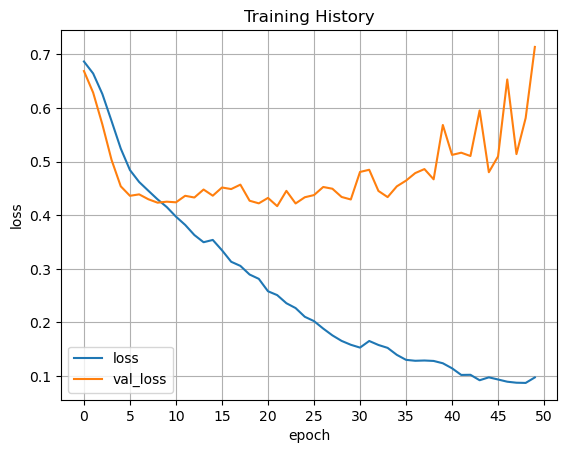

In [19]:
# Import librarys.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# show train and validation of loss in diagram.
hist_df.plot(y = ['loss', 'val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training History')
plt.grid(axis = 'both')
plt.xticks(np.arange(0.0, 51.0, 5.0))
plt.show()

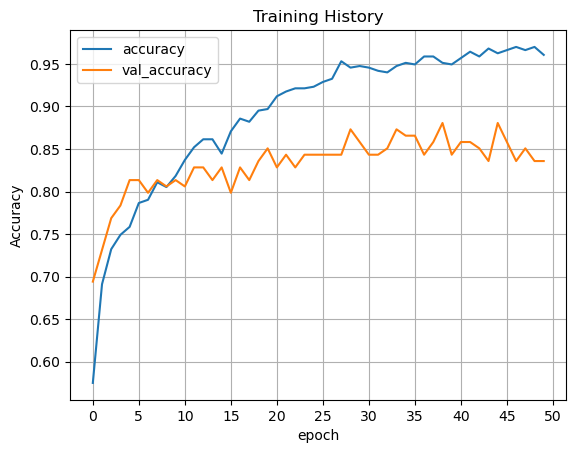

In [20]:
# Show the trainig and validation accuracy in diagram.
hist_df.plot(y = ['accuracy', 'val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.grid(axis = 'both')
plt.xticks(np.arange(0.0, 51.0, 5.0))
plt.show()

# Test And Calculate Accuracy

In [21]:
# load the best weights of neural network.
model.load_weights('saved-model/best-model')

# Testing the best weights.
model.evaluate(X_test_scaled, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.8750


[0.36748722195625305, 0.875]